In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

In [3]:
processed_mtx = pd.read_csv('~/Desktop/TCGA.HNSC.expression_log_zscore_all.txt', sep='\t')
top2000_genes_df = pd.read_csv('~/Desktop/top2000genesByVariance.txt', sep='\t', header=None)
top2000_genes = top2000_genes_df[0].tolist()

In [4]:
top2000_genes
df = processed_mtx[["patient_id", "sample_id"] + top2000_genes]
df

,patient_id,sample_id,KRT14|3861,KRT13|3860,KRT6A|3853,KRT16|3868,SMR3B|10879,KRT17|3872,KRT5|3852,KRT6B|3854,...,COPE|11316,ATP2A3|489,SELM|140606,H2AFV|94239,SLC2A3|6515,LMAN1|3998,PPP1R12B|4660,PPP1R14B|26472,ARPC5|10092,COX6A2|1339
0,TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,-0.156531,0.678732,-0.239946,-0.188856,-0.317122,0.779794,-0.062955,-0.323693,...,0.057767,0.459781,1.503990,-0.164521,0.252186,-0.870325,0.618860,1.297575,0.928127,1.388504
1,TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,-0.470498,-1.468832,-0.941358,-1.524001,-0.317122,-0.371578,-1.168484,-0.985705,...,2.547621,-1.733848,2.735510,4.463524,0.494605,0.163945,-2.348418,-0.360572,4.601139,0.022163
2,TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,0.093104,-1.574349,-0.160256,-0.302802,-0.317122,0.247415,-0.601409,-0.469751,...,0.787281,-1.727537,0.516257,3.133021,1.013435,-1.302697,-1.268033,1.248168,3.692336,0.571982
3,TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,0.087888,-0.117391,0.500978,0.516187,-0.317122,0.896905,-0.085720,0.317284,...,1.006513,-1.069119,0.880600,1.393114,-0.612534,0.236032,-1.638671,-0.345444,1.748855,-0.921184
4,TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,-0.006489,0.886169,0.179155,-0.035054,-0.097642,0.059038,0.113910,0.134567,...,0.589427,0.245955,1.053995,0.697583,-0.338106,0.442109,-0.085068,-0.684099,1.133114,0.033683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,TCGA-UF-A7JV,TCGA-UF-A7JV-01A-11R-A34R-07,-0.137477,0.302534,-0.137533,-0.327904,-0.317122,0.049982,-0.337685,0.078633,...,0.306898,-0.806893,-0.134918,-0.956070,1.577548,0.865561,-0.747664,1.556197,0.835586,-0.921184
541,TCGA-UP-A6WW,TCGA-UP-A6WW-01A-12R-A34R-07,-1.686173,0.602309,-0.710827,-0.415316,-0.317122,-0.027394,0.549744,-0.764436,...,0.383971,1.289270,1.654937,1.794308,-0.410368,0.931128,1.301645,0.033309,0.125999,0.119858
542,TCGA-WA-A7GZ,TCGA-WA-A7GZ-01A-11R-A34R-07,0.481570,0.437872,0.132688,-0.031654,-0.317122,0.589569,0.463747,-0.195401,...,-0.119576,-0.539484,-1.052592,-0.633713,-0.695423,0.654360,0.642112,0.461267,-1.155883,0.761550
543,TCGA-WA-A7GZ,TCGA-WA-A7GZ-11A-11R-A34R-07,-0.953014,1.662258,-1.510773,-1.853590,-0.317122,-3.442942,-0.557673,-1.474171,...,-1.158882,-0.869403,-1.144382,0.417194,-1.893053,-0.004350,3.166401,-1.119781,-2.624515,2.820234


In [5]:
# ———————————————
# 1. Prepare the data
# ———————————————
# assume `df` is your DataFrame with columns: patient_id, sample_id, gene1, gene2, … geneN
# set sample_id as the index and drop patient_id for clustering
expr = df.set_index('sample_id').drop(columns=['patient_id'])

In [6]:
# ———————————————
# 2. Compute hierarchical clustering
# ———————————————
# You can choose method='ward', 'average', etc., and metric='euclidean' (default)
row_linkage = linkage(expr, method='ward', metric='euclidean')

In [7]:
# ———————————————
# 3. Assign cluster labels
# ———————————————
n_clusters = 4  # ← change as needed
# fcluster returns 1…n_clusters; subtract 1 to get 0…n_clusters–1
clusters = fcluster(row_linkage, t=n_clusters, criterion='maxclust') - 1

# create a little metadata DataFrame for writing out and coloring
meta = df[['patient_id', 'sample_id']].copy()
meta['cluster'] = clusters

In [8]:
# ———————————————
# 4. Write out clusters to TSV
# ———————————————
meta.to_csv('~/Desktop/sample_clusters.tsv', sep='\t', index=False, header=True)

In [107]:
# ———————————————
# 5. Map clusters to colors for the heatmap “covariate”
# ———————————————
# use a qualitative palette from seaborn
palette = sns.color_palette('tab10', n_clusters)
lut = {i: palette[i] for i in range(n_clusters)}
cluster_colors = pd.Series(clusters, index=expr.index).map(lut)

/Users/clairez/miniforge3/envs/py_env/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


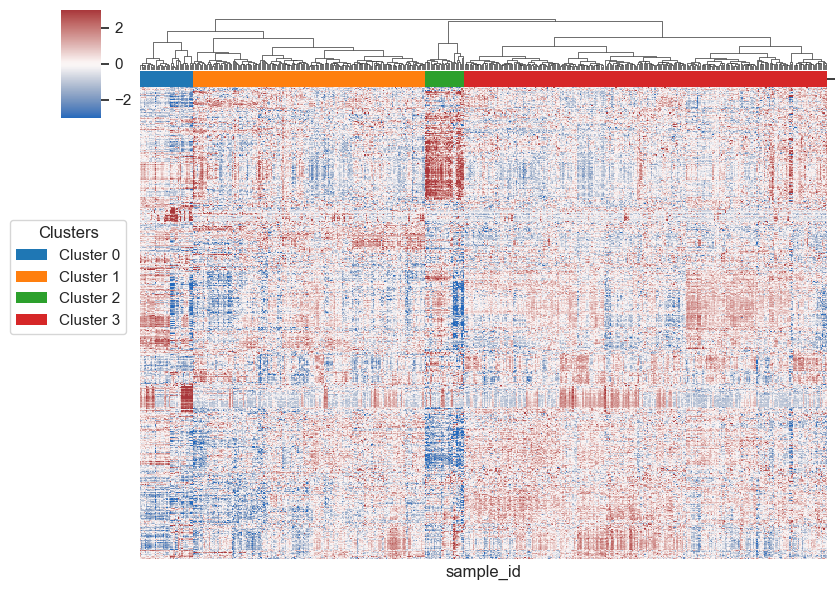

In [128]:
# ———————————————
# 6. Plot the heatmap with row_colors
# ———————————————
expr_T = expr.T

sns.set(context='notebook', style='white')
g = sns.clustermap(
    expr_T,
    col_linkage = row_linkage,    # cluster your samples across the top
    col_colors  = cluster_colors, # color‐bar on top for each sample
    cmap        = 'vlag',
    figsize     = (8, 6),
    center         = 0,          # make 0 → white
    vmin           = -3,         # clamp min at –3
    vmax           =  3,         # clamp max at +3
    dendrogram_ratio = 0.1,
    xticklabels = False,           # hide sample labels if too many
    yticklabels = False            # hide gene labels
)

g.ax_row_dendrogram.set_visible(False)

for cid, color in lut.items():
    g.ax_col_dendrogram.bar(
        0, 0, color=color,
        label=f'Cluster {cid}', linewidth=0
    )
g.ax_col_dendrogram.legend(loc='lower left',
                           bbox_to_anchor=(-0.2, -5),
                           ncol=1, title='Clusters')

plt.show()

In [63]:
expr_T

sample_id,TCGA-4P-AA8J-01A-11R-A39I-07,TCGA-BA-4074-01A-01R-1436-07,TCGA-BA-4075-01A-01R-1436-07,TCGA-BA-4076-01A-01R-1436-07,TCGA-BA-4077-01B-01R-1436-07,TCGA-BA-4078-01A-01R-1436-07,TCGA-BA-5149-01A-01R-1514-07,TCGA-BA-5151-01A-01R-1436-07,TCGA-BA-5152-01A-02R-1873-07,TCGA-BA-5153-01A-01R-1436-07,...,TCGA-UF-A7JJ-01A-11R-A34R-07,TCGA-UF-A7JK-01A-11R-A34R-07,TCGA-UF-A7JO-01A-11R-A34R-07,TCGA-UF-A7JS-01A-11R-A34R-07,TCGA-UF-A7JT-01A-11R-A34R-07,TCGA-UF-A7JV-01A-11R-A34R-07,TCGA-UP-A6WW-01A-12R-A34R-07,TCGA-WA-A7GZ-01A-11R-A34R-07,TCGA-WA-A7GZ-11A-11R-A34R-07,TCGA-WA-A7H4-01A-21R-A34R-07
KRT14|3861,-0.156531,-0.470498,0.093104,0.087888,-0.006489,-0.282576,0.552395,0.464004,0.530901,-1.618199,...,0.201361,0.757716,0.176116,1.191343,0.296239,-0.137477,-1.686173,0.481570,-0.953014,0.217744
KRT13|3860,0.678732,-1.468832,-1.574349,-0.117391,0.886169,0.259802,-1.934319,-0.696148,1.176216,1.047974,...,0.207611,-0.665304,-0.865628,-0.268418,-0.720049,0.302534,0.602309,0.437872,1.662258,-1.384713
KRT6A|3853,-0.239946,-0.941358,-0.160256,0.500978,0.179155,-0.866653,0.299465,0.660866,0.488159,-0.857729,...,0.341461,0.464055,0.293057,-0.106760,0.157469,-0.137533,-0.710827,0.132688,-1.510773,-0.414432
KRT16|3868,-0.188856,-1.524001,-0.302802,0.516187,-0.035054,-2.374109,0.283638,0.525937,0.522109,-1.833695,...,0.613271,0.755725,0.055458,0.689980,0.437482,-0.327904,-0.415316,-0.031654,-1.853590,-0.254488
SMR3B|10879,-0.317122,-0.317122,-0.317122,-0.317122,-0.097642,-0.317122,-0.317122,-0.317122,-0.317122,0.053513,...,-0.317122,-0.317122,-0.317122,-0.317122,-0.116164,-0.317122,-0.317122,-0.317122,-0.317122,0.665701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMAN1|3998,-0.870325,0.163945,-1.302697,0.236032,0.442109,1.581209,0.420038,0.931491,-0.207242,2.685308,...,0.833634,-1.415728,-0.753778,-5.000275,-1.641955,0.865561,0.931128,0.654360,-0.004350,-0.134945
PPP1R12B|4660,0.618860,-2.348418,-1.268033,-1.638671,-0.085068,-0.321357,-0.822908,0.221603,-1.040656,0.496404,...,-0.460250,-0.310008,-1.148808,-0.054671,-1.319119,-0.747664,1.301645,0.642112,3.166401,1.404625
PPP1R14B|26472,1.297575,-0.360572,1.248168,-0.345444,-0.684099,-2.040707,-1.197427,-1.690308,-0.141812,-1.865251,...,-0.435967,-0.143519,0.677848,2.758096,1.289435,1.556197,0.033309,0.461267,-1.119781,0.444495
ARPC5|10092,0.928127,4.601139,3.692336,1.748855,1.133114,-0.241029,-2.395537,0.129315,0.198544,-0.573466,...,0.507915,0.082707,1.274490,2.075260,1.236792,0.835586,0.125999,-1.155883,-2.624515,0.037933
